# Apprentissage supervisé - Regression, DecisionTreeRegressor, RandomForestRegressor

# 1. Préparation des données

## 1.1. Téléchargement de données

Téléchargez le jeu de données housing.csv. Placez le dans le même répertoire de votre fichier
(Python ou Notebook).

## Information sur les données

1. Créez un code qui lit le fichier "housing.csv" et affiche ses premières lignes. Pour ce faire, utilisez les fonctions "read_csv" et "head" de la bibliothèque pandas. Sachant que la valeur cible est "median_house_value", traitons-nous un problème de classification ou de régression ?

In [1]:
import pandas as pd
import numpy as np

housing = pd.read_csv("housing.csv")
display(housing.head())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


``median_house_value`` étant une variable quantitative, il s'agit plutôt d'un problème de régression.

2. Créez un code qui affiche le nombre de lignes et de colonnes des données, le type des attributs et le nombre de valeurs non nulles. Quelle remarque sur l’attribut "total_bedrooms" par rapport aux autres attributs ?

In [2]:
print(f"Nombre de lignes et colonnes :\n{housing.shape}\n\nType des attributs :\n{housing.dtypes}\n\nValeurs non nulles :\n{housing.notnull().sum()}")

Nombre de lignes et colonnes :
(20640, 10)

Type des attributs :
longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

Valeurs non nulles :
longitude             20640
latitude              20640
housing_median_age    20640
total_rooms           20640
total_bedrooms        20433
population            20640
households            20640
median_income         20640
median_house_value    20640
ocean_proximity       20640
dtype: int64


``total_bedrooms`` est le seul attribut possédant des valeurs nulles.

3. A travers la question précédente, vous avez du remarquez que le type dans valeurs utilisées dans l’attribut "ocean_proximity" est un objet (forcément un texte vu qu’on manipule un fichier CSV). Il est intéressant de connaître ses valeurs. Pour cette finalité, créez un code qui affiche l’occurrence des valeurs utilisées dans cet attribut.

In [3]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

4. Créez un code qui affiche des statistiques sur les attributs de ton jeu de données.

In [4]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


5. Créez un code qui affiche les histogrammes des différents attributs. Le nombre de "bins" à saisir est 50 et la taille de chaque histogramme "figsize=(20,15)".

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000177C4F57490>,
      dtype=object)

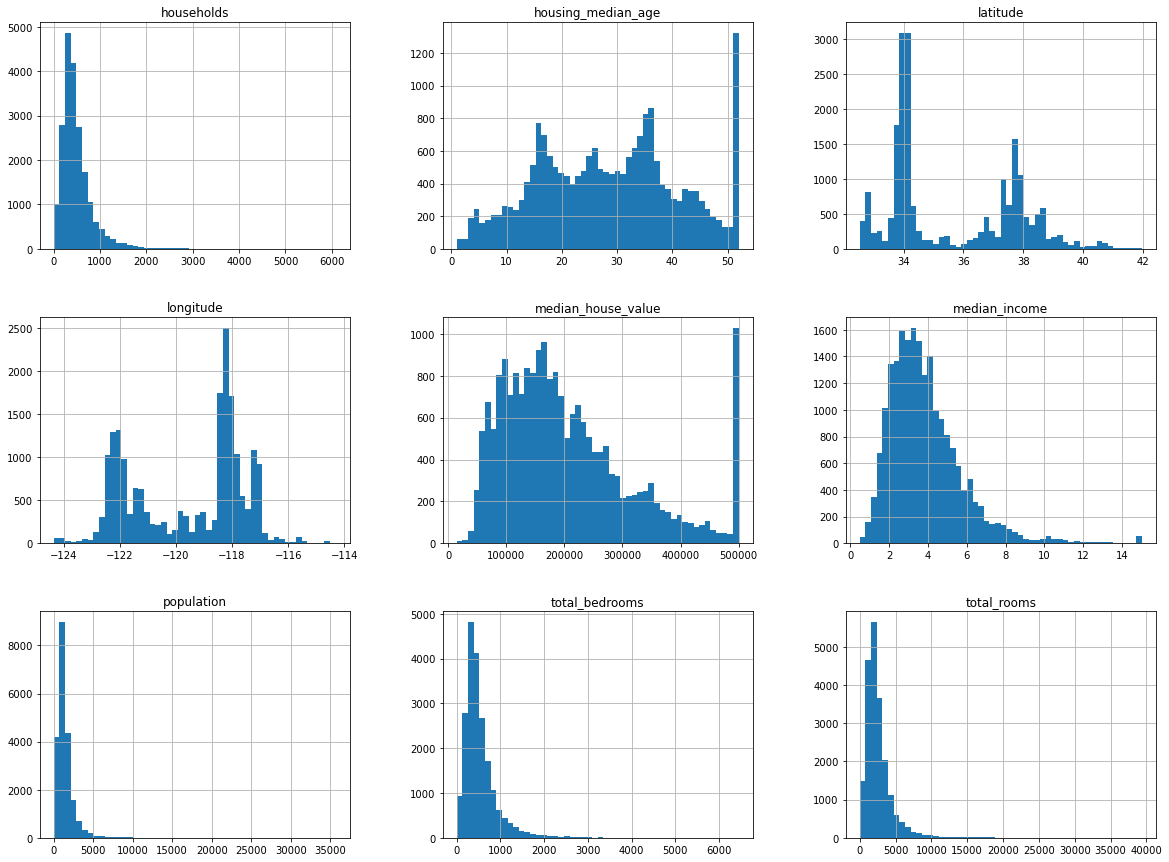

In [5]:
housing.hist(bins=50, figsize=(20,15))

## 1.3 Répartition des données

1. Créez un code qui partitionne les données en base d’apprentissage et base de test. Optez pour 80% pour l’apprentissage et 20% pour le test.

2. Affichez l’en-tête de la base de test

In [6]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(housing, test_size=0.2)
display(train.head())
display(test.head())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12906,-121.34,38.61,20.0,5801.0,1148.0,2586.0,1063.0,3.9063,162100.0,INLAND
14744,-117.06,32.57,16.0,1269.0,282.0,1609.0,298.0,2.6985,156500.0,NEAR OCEAN
6848,-118.14,34.06,39.0,2390.0,444.0,1246.0,422.0,3.7857,245700.0,<1H OCEAN
11983,-117.48,34.01,23.0,2000.0,376.0,1361.0,388.0,4.3690,121100.0,INLAND
652,-122.13,37.71,44.0,1613.0,339.0,776.0,346.0,3.1103,188900.0,NEAR BAY


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
10716,-117.83,33.66,4.0,1011.0,198.0,511.0,198.0,7.9217,296200.0,<1H OCEAN
13291,-117.66,34.07,33.0,2081.0,409.0,1008.0,375.0,2.5870,138100.0,INLAND
17491,-119.83,34.43,31.0,798.0,346.0,699.0,301.0,2.1417,205000.0,NEAR OCEAN
14352,-117.22,32.75,24.0,3914.0,985.0,2147.0,874.0,2.9735,225000.0,NEAR OCEAN
8236,-118.19,33.76,25.0,1442.0,392.0,632.0,385.0,4.6629,162500.0,NEAR OCEAN


## 1.4 Découverte et visualisation des données

1. Créez un code qui affiche en abscisse la longitude et en ordonnée la latitude. Optez pour le type scatter dans la fonction plot pour l’affichage et une valeur d’alpha (c’est un paramètre qui joue sur la transparence de la courbe) de 0.1 pour un affichage plus clair.

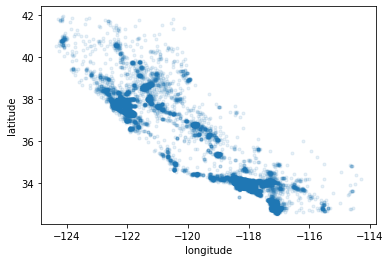

In [7]:
x = train["longitude"]
y = train["latitude"]

import matplotlib.pyplot as plt

plt.scatter(x, y, alpha=0.1, marker=".")
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.show()

2. Créez un code qui permet d’avoir une idée sur le lien entre la position géographique et le prix des maisons (target). Optez pour une valeur égale à False de "sharex".

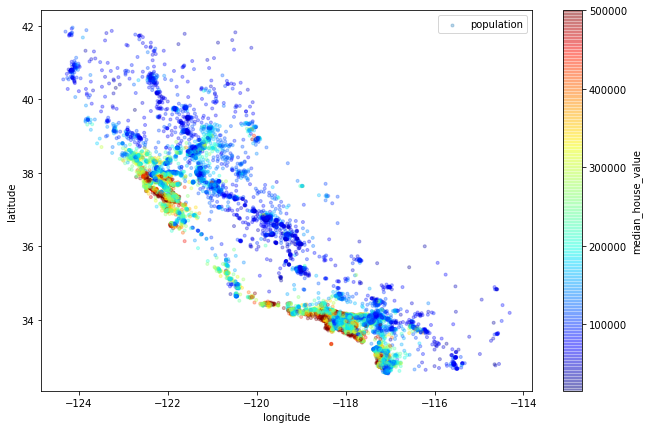

In [8]:
plt.scatter(x, y, alpha=0.3, marker=".", label="population", c=train["median_house_value"], cmap='jet')
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.colorbar(label="median_house_value")
plt.legend()
plt.gcf().set_size_inches(11,7)
plt.show()

3. Modifiez le graphe de la question précédente pour savoir la raison du prix élevé de quelques maisons. Pour ce faire :

• Téléchargez l’image de la californie

• Utilisez la fonction imread du sous-module image du module matplotlib

• Utilisez la fonction imshow du sous-module pyplot du module matplotlib

[-124.55, -113.61, 32.44, 42.150000000000006]


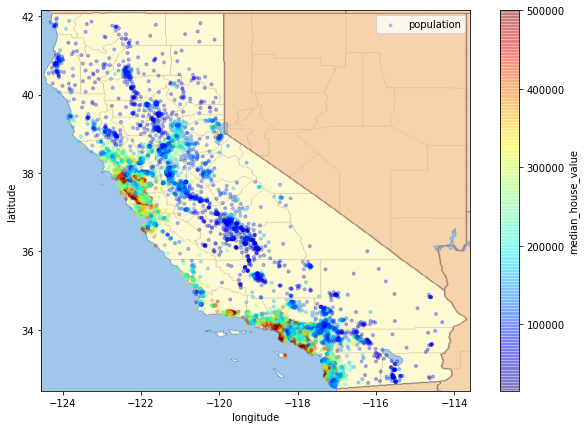

In [9]:
import pylab

coord = [x.min()-0.2, x.max()+0.7, y.min()-0.1, y.max()+0.2]
print(coord)

plt.imshow(plt.imread("california.png"), extent=coord)
plt.scatter(x, y, alpha=0.3, marker=".", label="population", c=train["median_house_value"], cmap='jet')
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.colorbar(label="median_house_value")
plt.legend()
plt.gcf().set_size_inches(11,7)
plt.show()

Les bâtiments les plus chers se retrouvent dans les grandes villes côtières : San Francisco, Los Angeles, Santa Barbara, etc...

<img src="https://i0.wp.com/whatsanswer.com/wp-content/uploads/2018/04/California-Cities-Map-Cities-Map-of-California-1.jpg" width=500px>

4. Une pratique très intéressante dans l’analyse de données est l’étude des corrélation entre les variables. Créez un code qui affiche, en valeur, la corrélation de l’attribut "median_house_value" avec les autres attributs. Qu’est ce que vous remarquez ?

On transforme les valeurs ocean_proximity en valeurs numériques basées sur leur moyenne :

INLAND
124629.04760994265
ISLAND
403675.0
<1H OCEAN
239888.11033919084
NEAR BAY
259409.09880564603
NEAR OCEAN
247610.81575178998


C:\Users\utilisateur\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12906,-121.34,38.61,20.0,5801.0,1148.0,2586.0,1063.0,3.9063,162100.0,124629.047610
14744,-117.06,32.57,16.0,1269.0,282.0,1609.0,298.0,2.6985,156500.0,247610.815752
6848,-118.14,34.06,39.0,2390.0,444.0,1246.0,422.0,3.7857,245700.0,239888.110339
11983,-117.48,34.01,23.0,2000.0,376.0,1361.0,388.0,4.3690,121100.0,124629.047610
652,-122.13,37.71,44.0,1613.0,339.0,776.0,346.0,3.1103,188900.0,259409.098806
...,...,...,...,...,...,...,...,...,...,...
1593,-122.14,37.90,32.0,5738.0,746.0,2099.0,732.0,10.3224,500001.0,259409.098806
19969,-119.09,36.21,38.0,1901.0,453.0,1613.0,400.0,1.8828,44600.0,124629.047610
8536,-118.35,33.89,30.0,1143.0,299.0,776.0,273.0,4.2829,240000.0,239888.110339
13442,-117.43,34.09,18.0,3172.0,632.0,1621.0,573.0,2.7437,120200.0,124629.047610


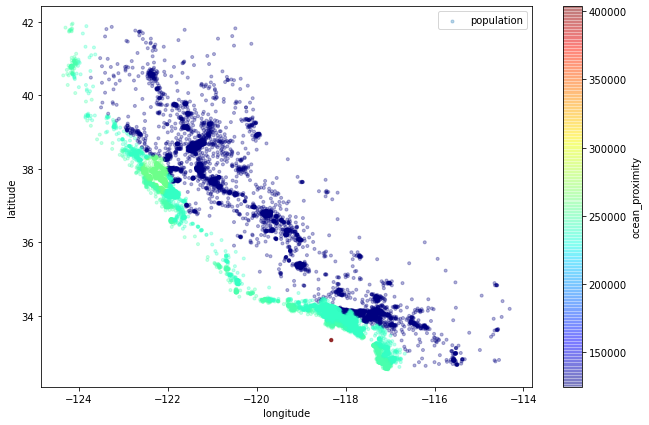

In [10]:
list_ocean_labels = set(train["ocean_proximity"])
for label in list_ocean_labels:
    print(label)
    value_ocean = train["median_house_value"][train.ocean_proximity == label].mean()
    print(value_ocean)
    train["ocean_proximity"].replace({label: value_ocean}, inplace=True)
    
display(train)

plt.scatter(x, y, alpha=0.3, marker=".", label="population", c=train["ocean_proximity"], cmap='jet')
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.colorbar(label="ocean_proximity")
plt.legend()
plt.gcf().set_size_inches(11,7)
plt.show()

Les moyennes de ces valeurs semblent augmenter avec une distance moindre par rapport à l'océan.

In [11]:
list_ocean = list()
for value in train["ocean_proximity"]:
    list_ocean.append(int(value))
train = train.drop(columns="ocean_proximity")
train["ocean_proximity"] = list_ocean

display(train.corr()["median_house_value"])

longitude            -0.048062
latitude             -0.141230
housing_median_age    0.099602
total_rooms           0.136801
total_bedrooms        0.053945
population           -0.019284
households            0.069769
median_income         0.688080
median_house_value    1.000000
ocean_proximity       0.486566
Name: median_house_value, dtype: float64

``median_house_value`` est très faiblement corrélée avec la plupart des autres valeurs numériques sauf une corrélation directe relativement importante avec``median_income``, de façon assez prévisible. Il existe une corrélation d'importance modérée avec les moyennes de la catégorie ``ocean_proximity`` : la proximité avec l'océan est un facteur d'augmentation des bâtiments.

## 1.5 Nettoyage des données

Avant d’intégrer les données dans un algorithme d’apprentissage automatique, il est indispensable de séparer le "features" et la valeur cible (target).

1. Créez un code permettant de créer deux variables :

• Une première contenant que les input. Utilisez la fonction drop du module pandas

• Une deuxième contenant que les labels. Utilisez la fonction copy du module pandas

2. Dans la question 8, vous avez dû remarquer que l’attribut "total_bedrooms" a des valeurs manquantes (NaN). Pour remédier à ceci, il existes trois options :

• Supprimer les valeurs manquantes (NaN)

• Supprimer l’attribut "total_bedrooms"

• Remplacer les valeurs manquantes par une autre valeur (0, la moyenne, la médiane, . . . ). Nous optons pour cette méthode. Ecrivez un code qui remplace les valeurs manquantes par la médiane. Utilisez les fonctions median et fillna du module Pandas. Vérifiez avec la fonction "info" si le problème a été résolu.

In [12]:
train["total_bedrooms"] = train["total_bedrooms"].fillna(train["total_bedrooms"].mean())

train["total_bedrooms"].isna().value_counts()

False    16512
Name: total_bedrooms, dtype: int64

3. Les algorithmes d’apprentissage profond préfère de travailler avec les données numériques. Ceci est valable pour tous les attributs sauf "ocean_proximity". Vérifiez ceci en affichant 10 de ces valeurs. Transformer les valeurs qualitatives en des valeurs numériques.

4. Affichez les données pour vérifier le résultat.

In [13]:
display(train)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12906,-121.34,38.61,20.0,5801.0,1148.0,2586.0,1063.0,3.9063,162100.0,124629
14744,-117.06,32.57,16.0,1269.0,282.0,1609.0,298.0,2.6985,156500.0,247610
6848,-118.14,34.06,39.0,2390.0,444.0,1246.0,422.0,3.7857,245700.0,239888
11983,-117.48,34.01,23.0,2000.0,376.0,1361.0,388.0,4.3690,121100.0,124629
652,-122.13,37.71,44.0,1613.0,339.0,776.0,346.0,3.1103,188900.0,259409
...,...,...,...,...,...,...,...,...,...,...
1593,-122.14,37.90,32.0,5738.0,746.0,2099.0,732.0,10.3224,500001.0,259409
19969,-119.09,36.21,38.0,1901.0,453.0,1613.0,400.0,1.8828,44600.0,124629
8536,-118.35,33.89,30.0,1143.0,299.0,776.0,273.0,4.2829,240000.0,239888
13442,-117.43,34.09,18.0,3172.0,632.0,1621.0,573.0,2.7437,120200.0,124629


## 2 Sélection, apprentissage et évaluation du modèle

1. Créez un code permettant d’appliquer la régression linéaire sur les données d’apprentissage.

In [14]:
from sklearn.linear_model import LinearRegression

def reg(data):
    X = data.drop(columns = "median_house_value")
    y = data["median_house_value"]
    
    return LinearRegression().fit(X, y)

2. Créez un code qui prédit les classes de la base d’apprentissage. Pour ce faire, utilisez la méthode predict de la classe LinearRegression en donnant comme argument les données d’apprentissage. Ensuite, affichez les valeurs cible réelles et celles prédites.

In [15]:
y_pred = reg(train).predict(train.drop(columns = "median_house_value"))

y_true = np.array(train["median_house_value"])

display(y_pred)
display(y_true)

array([168806.82948191, 141934.93696942, 222541.09204204, ...,
       245349.24306852, 111577.76191497,  93888.49911387])

array([162100., 156500., 245700., ..., 240000., 120200.,  93800.])

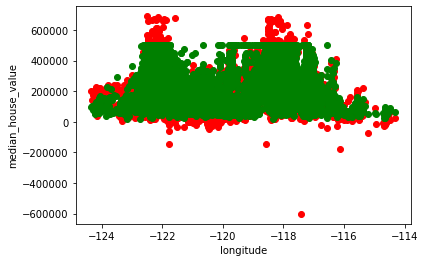

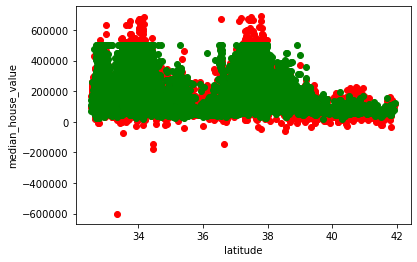

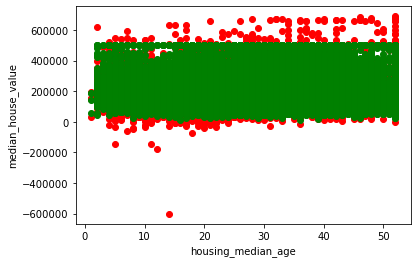

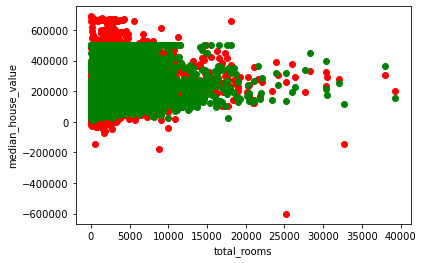

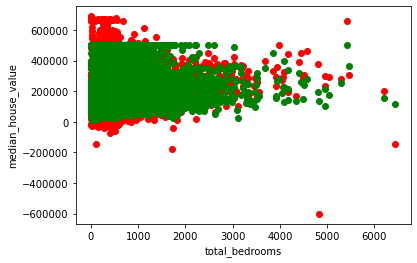

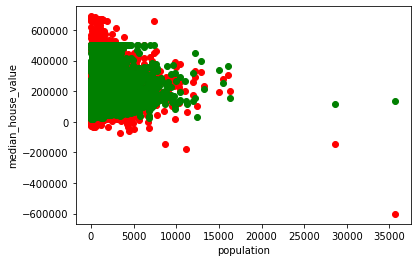

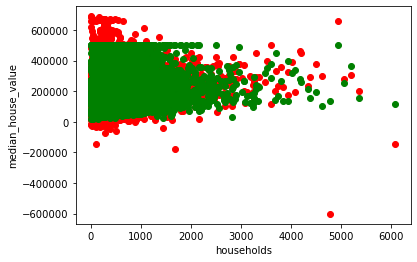

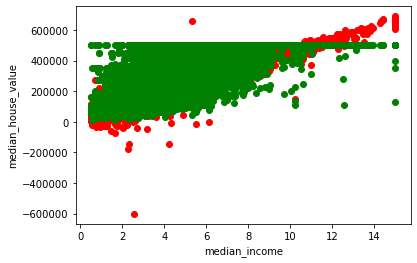

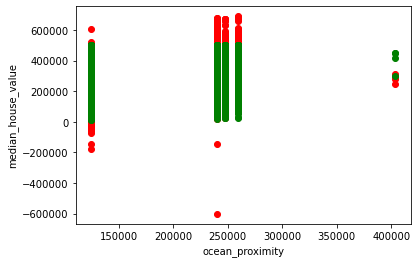

In [16]:
for column in train.drop(columns = "median_house_value"):
    x_column = train[column]
    plt.scatter(x_column, y_pred, c = 'red')
    plt.scatter(x_column, y_true, c = 'green')
    plt.xlabel(column)
    plt.ylabel("median_house_value")
    plt.show()

3. Calculez la mesure RMSE du modèle de la régression linéaire.

In [17]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_true, y_pred)

4771518242.115574

4. Refaites les deux étapes précédentes avec le modèle DecisionTreeRegressor. Calculez la mesure RMSE du modèle DecisionTreeRegressor qui existe dans le sous-module tree du module sklearn.

In [18]:
from sklearn import tree

def tree_reg(data):
    X = data.drop(columns = "median_house_value")
    y = data["median_house_value"]
    
    return tree.DecisionTreeClassifier().fit(X, y)

In [19]:
y_tree = tree_reg(train).predict(train.drop(columns = "median_house_value"))

display(y_tree)

array([162100., 156500., 245700., ..., 240000., 120200.,  93800.])

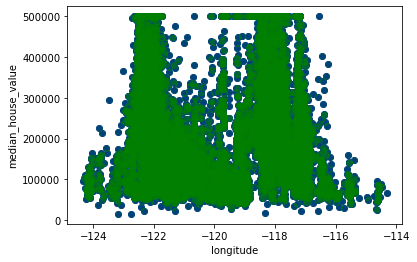

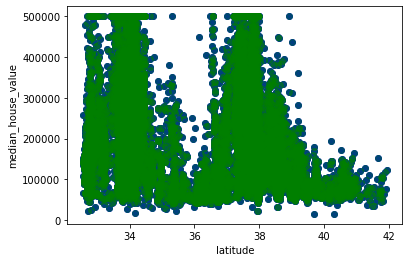

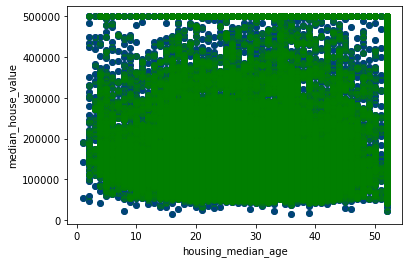

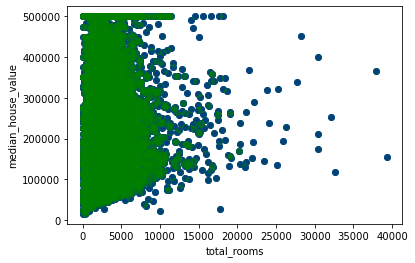

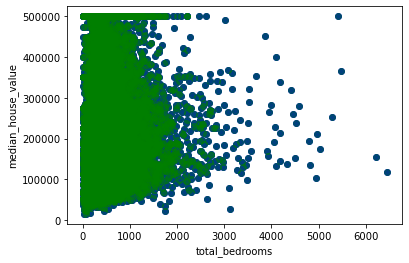

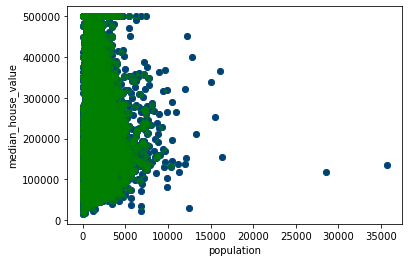

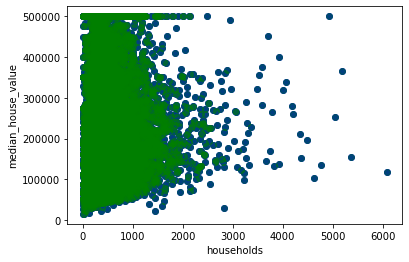

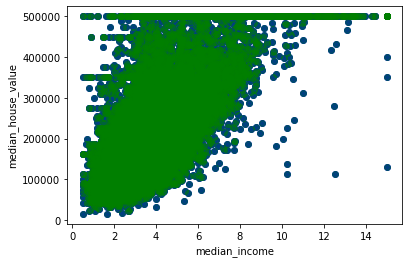

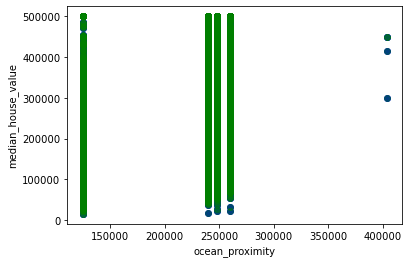

In [20]:
for column in train.drop(columns = "median_house_value"):
    x_column = train[column]
    plt.scatter(x_column, y_tree, c = 'blue')
    plt.scatter(x_column, y_true, c = 'green', alpha=0.5)
    plt.xlabel(column)
    plt.ylabel("median_house_value")
    plt.show()

In [21]:
mean_squared_error(y_true, y_tree)

0.0

Même si la valeur de RMSE de DecisionTreeRegressor est égale à 0, on ne peut pas conclure que ce modèle fonctionne parfaitement sur la base d’apprentissage. Pour s’assurer, on va répartir la base d’apprentissage en base d’apprentissage et en base de test en utilisant la méthode 10-fold cross-validation. Pour ce faire, utilisez la fonction cross_val_score du sousmodule model_selection du module sklearn. Ensuite, affichez :

• La valeur RMSE de chaque fold

• La moyenne des RMSE de tous les folds

• L’écart type de tous les folds

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=0)

def cross(data):
    X = data.drop(columns = "median_house_value")
    y = data["median_house_value"]
    return cross_val_score(regressor, X, y, cv=3)

folds = cross(train)
display(folds)

array([0.6303413 , 0.6036739 , 0.63444176])

6. Suivre les étapes de la question précédente sur le modèle de la régression linéaire. Ensuite, comparez les résultats avec ceux du DecisionTreeRegressor. Quel modèle présente un problème d’apprentissage ? pourquoi ?

 ## 3 Fine-Tunning

3.1 Grid Search

Dans cette, partie nous allons chercher les paramètres du modèle de régression qui donnent les meilleurs résultats

1. Écrire un code qui :

• Crée un objet de la classe RandomForestRegressor

Crée la variable suivante :

``param_grid = [0n_estimators0 : [3, 10, 30],0 max_ f eatures0 : [2, 4, 6, 8]]``

Cette variable contient un dictionnaire avec quelques valeurs de deux paramètres de la méthode RandomForestRegressor. Au total, 4x3=12 combinaisons vont être testées.

• Applique une recherche, de type GridSearch, du couple qui donne le meilleur résultat. Pour ce faire, utilisez la fonction GridSearchCV du sous-module model_selection du module sklearn. Optez pour une valeur de 5 pour "cv" (une validation croisée de type 5-fold cross-validation)

In [23]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

def rfr_model(X, y):# Perform Grid-Search
    gsc = GridSearchCV(estimator=RandomForestRegressor(), param_grid=[{"n_estimators": [3, 10, 30], "max_features": [2, 4, 6, 8]}], cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
    
    grid_result = gsc.fit(X, y)
    
    return grid_result

In [24]:
combinations = rfr_model(train.drop(columns = "median_house_value"), train["median_house_value"])
display(combinations)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]}],
             scoring='neg_mean_squared_error')

2. Affichez les meilleurs paramètres de la méthode RandomForestRegressor en utilisant la fonction best_params_

In [25]:
best_params = combinations.best_params_
display(best_params)

{'max_features': 6, 'n_estimators': 30}

3. Affichez les résultats des 12 combinaisons avec la fonction grid-search

In [26]:
rfr = RandomForestRegressor(n_estimators=best_params["n_estimators"], random_state=False, verbose=False)
scores = cross_val_score(rfr, housing.drop(columns = "median_house_value"), housing["median_house_value"], cv=10, scoring='neg_mean_absolute_error')

display(scores)

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 303, in fit
    X, y = self._validate_data(X, y, multi_output=True,
  File "C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 72, in inner_f
    return f(**kwargs)
  File "C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 795, in check_X_y
    X = check_array(

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

## 3.2 Evaluation sur la base de test

Testez votre modèle d’apprentissage sur la base de test. Pour ce faire, pensez à :

1. Remplacer les valeurs NaN de l’attribut "total_bedrooms" de la base de test par la médiane

In [27]:
test["total_bedrooms"] = test["total_bedrooms"].fillna(test["total_bedrooms"].mean())

test["total_bedrooms"].isna().value_counts()

<ipython-input-27-ac67f5f03e82>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["total_bedrooms"] = test["total_bedrooms"].fillna(test["total_bedrooms"].mean())


False    4128
Name: total_bedrooms, dtype: int64

2. Transformer les valeurs textuelles de "ocean_proximity" en valeurs numériques

In [28]:
list_ocean_labels_test = set(test["ocean_proximity"])
for label in list_ocean_labels_test:
    print(label)
    value_ocean = test["median_house_value"][test.ocean_proximity == label].mean()
    print(value_ocean)
    test["ocean_proximity"].replace({label: value_ocean}, inplace=True)
    
display(test)

INLAND
125503.56093868281
ISLAND
287500.0
<1H OCEAN
240886.58161559887
NEAR BAY
258403.20089285713
NEAR OCEAN
256218.21136767318


C:\Users\utilisateur\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
10716,-117.83,33.66,4.0,1011.0,198.0,511.0,198.0,7.9217,296200.0,240886.581616
13291,-117.66,34.07,33.0,2081.0,409.0,1008.0,375.0,2.5870,138100.0,125503.560939
17491,-119.83,34.43,31.0,798.0,346.0,699.0,301.0,2.1417,205000.0,256218.211368
14352,-117.22,32.75,24.0,3914.0,985.0,2147.0,874.0,2.9735,225000.0,256218.211368
8236,-118.19,33.76,25.0,1442.0,392.0,632.0,385.0,4.6629,162500.0,256218.211368
...,...,...,...,...,...,...,...,...,...,...
20326,-118.96,34.30,16.0,3103.0,482.0,1567.0,467.0,6.9070,500001.0,240886.581616
3854,-118.43,34.18,25.0,3830.0,1105.0,2328.0,1017.0,2.6238,210000.0,240886.581616
12650,-121.47,38.52,42.0,2316.0,515.0,1597.0,522.0,1.8205,60400.0,125503.560939
13737,-117.21,34.04,14.0,3063.0,426.0,1570.0,419.0,6.2917,224700.0,125503.560939


3. Stocker le modèle d’apprentissage dans une variable en utilisant la fonction best_estimator_ du module GridSearchCV

In [29]:
combinations_test = rfr_model(train.drop(columns = "median_house_value"), train["median_house_value"])
best_params_test = combinations_test.best_params_
display(best_params_test)

{'max_features': 6, 'n_estimators': 30}

4. Calculer la valeur RMSE du modèle sur la base de test